# Valenbici

<img src="../img/valenbici.jpg">

- http://www.valenbisi.es/service/carto/json
- http://www.valenbisi.es/service/stationdetails/valence/63

In [13]:
import pandas as pd
from os import path

bicis_path = path.join('../res','estaciones_bici.csv')
bicis = pd.read_csv(bicis_path, sep=';')
data = bicis[['station', 'total', 'download_date', 'available']]

display(data.head())
display(data.info())
display(data.describe(include='all'))

,station,total,download_date,available
0,64,20,2019-02-10 17:25:37.787,9
1,73,20,2019-02-10 17:25:37.787,6
2,63,20,2019-02-10 18:13:39.827,20
3,64,20,2019-02-10 18:13:39.827,6
4,65,19,2019-02-10 18:13:39.827,9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27547 entries, 0 to 27546
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   station        27547 non-null  int64 
 1   total          27547 non-null  int64 
 2   download_date  27547 non-null  object
 3   available      27547 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 861.0+ KB


None

,station,total,download_date,available
count,27547.000000,27547.000000,27547,27547.000000
unique,NaN,NaN,105,NaN
top,NaN,NaN,2019-02-11 07:10:37.297,NaN
freq,NaN,NaN,276,NaN
mean,138.449196,19.915381,NaN,8.974444
std,79.657747,5.570912,NaN,7.307137
min,1.000000,10.000000,NaN,0.000000
25%,69.000000,15.000000,NaN,3.000000
50%,139.000000,20.000000,NaN,8.000000
75%,207.000000,20.000000,NaN,14.000000


### - 02 - Obtención del número de estaciones que tienen 30 bornetas disponibles

In [14]:
data[data['total'] == 30]

,station,total,download_date,available
29,101,30,2019-02-10 18:13:39.827,30
34,117,30,2019-02-10 18:13:39.827,19
82,89,30,2019-02-10 18:13:39.827,7
86,105,30,2019-02-10 18:13:39.827,11
113,143,30,2019-02-10 18:13:39.827,21
...,...,...,...,...
27417,111,30,2019-02-11 23:44:00.786,0
27419,114,30,2019-02-11 23:44:00.786,0
27460,189,30,2019-02-11 23:44:00.786,9
27490,226,30,2019-02-11 23:44:00.786,1


### - 03 - Número de estación con la media más alta de bicis disponibles

In [15]:
max_station = data.groupby('station', as_index=False)['available'].mean().nlargest(1, 'available').iloc[0]['station']
print('Estacion: ', max_station)

Estacion:  50.0


### - 04 - Realizar el histograma de bicis disponibles de la estación del punto anterior

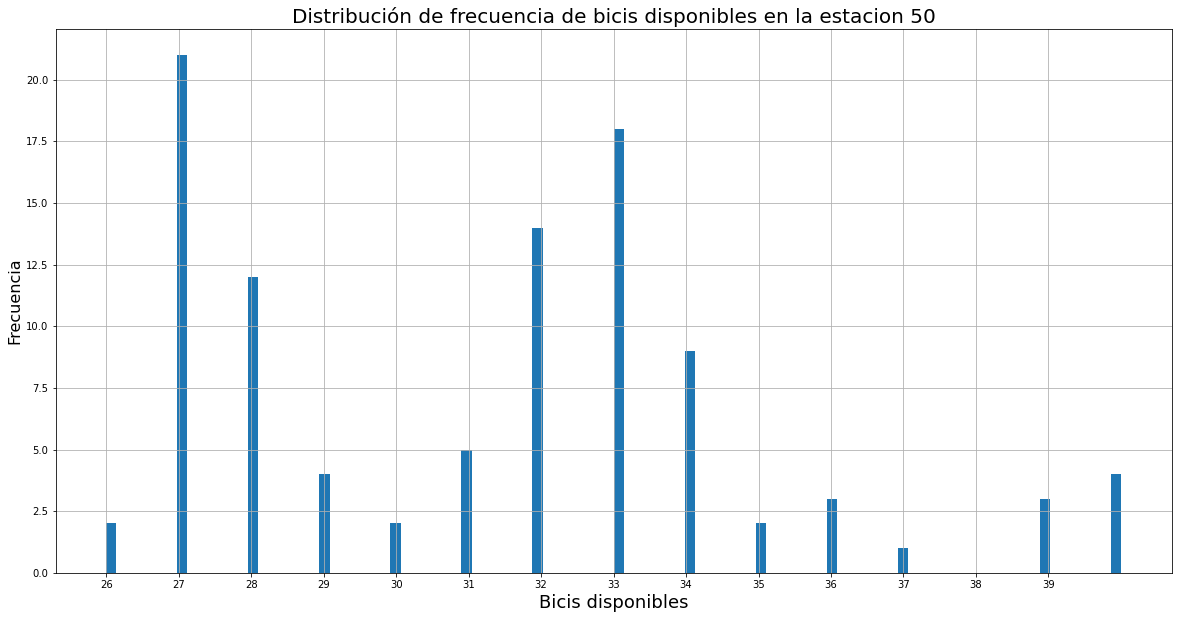

In [63]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize = (20, 10))

data_station = data[data['station'] == max_station]

plt.title('Distribución de frecuencia de bicis disponibles en la estacion 50', fontsize=20)
plt.xlabel('Bicis disponibles', fontsize=18)
plt.ylabel('Frecuencia', fontsize=16)
ax.set_xticks(np.arange(data_station['available'].min(),data_station['available'].max()))

plt.hist(data_station['available'], bins = 100)

plt.grid()
plt.show()
plt.close()

### - 05 - Realizar gráfica con  la línea temporal de bicis disponibles de la estación del punto anterior.

In [64]:
data[data['station'] == max_station]

,station,total,download_date,available
74,50,40,2019-02-10 18:13:39.827,39
350,50,40,2019-02-10 18:29:13.135,36
625,50,40,2019-02-10 18:44:43.728,33
901,50,40,2019-02-10 19:00:14.475,31
1177,50,40,2019-02-10 19:15:48.800,33
...,...,...,...,...
26239,50,40,2019-02-11 22:41:56.937,32
26515,50,40,2019-02-11 22:57:27.760,33
26791,50,40,2019-02-11 23:12:58.602,33
27067,50,40,2019-02-11 23:28:29.903,32


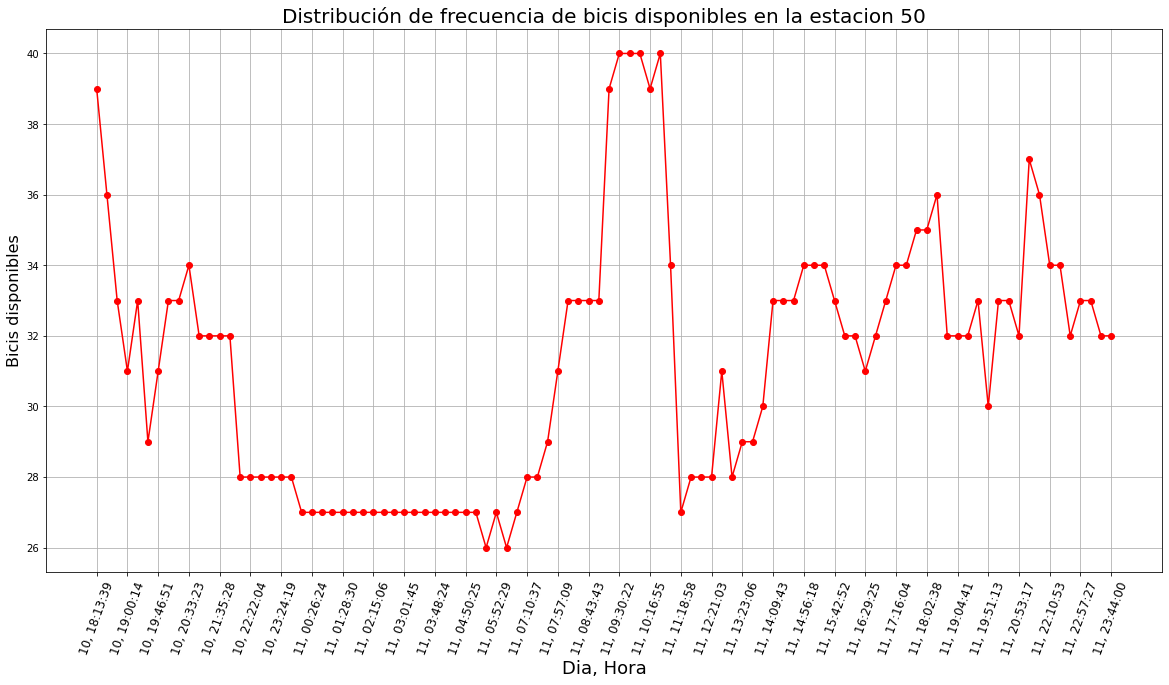

In [144]:
data_station = data[data['station'] == max_station].copy()
data_station.loc[:, 'download_date'] = pd.to_datetime(data_station['download_date'])
data_station.loc[:, 'download_date'] = data_station['download_date'].dt.strftime("%d, %H:%M:%S")
data_station.set_index('download_date', inplace=True)

fig, ax = plt.subplots(figsize = (20, 10))

ax.plot(data_station['available'], 'r-o')

plt.title('Distribución de frecuencia de bicis disponibles en la estacion 50', fontsize=20)
plt.xlabel('Dia, Hora', fontsize=18)
plt.ylabel('Bicis disponibles', fontsize=16)
plt.xticks(data_station.index[::3], rotation=70, fontsize = 12)
plt.grid()
plt.show()
plt.close()